In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
import math
import numpy as np
import matplotlib.pylab as pl
import matplotlib.patches as mpl_patches
import os.path
from itertools import cycle
import string
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

In [95]:
n_measurements = 20 #no. of different values used
max_gRate = 0.083
immigration_rate = 0.8
K = 10000
#when deterioration greater than this value we change from immigration dominated to deterioration dominated
phase2_lim = immigration_rate/K 
phase2_lim_scaled = phase2_lim/max_gRate

N_thresh_min = 0. #range of values for N*
N_thresh_max = 1.5
delta_N_thresh = (N_thresh_max - N_thresh_min)/n_measurements

det_ratio_min = 0. #range of values for deterioration ratio
det_ratio_max = 1.5
delta_det_ratio = (det_ratio_max - det_ratio_min)/n_measurements

det_ratio_vals = np.linspace(det_ratio_min, det_ratio_max, 101)

#collection of the parameter pairs used in the histograms of the time to 1st microhab
# commented out b2 and s2 as we didn't use them for the big rep runs
histogram_param_pairs = [(1.35,  0.6),
                         #(1.20,  0.675),
                         (0.825, 1.2),
                         #(0.75,  1.35),
                         (0.6,   0.3),
                         (0.45,  1.2)]

#these are used to "easily" identify
histogram_param_pair_labels = ["b1", 
                               #"b2", 
                               "s1", 
                               #"s2", 
                               "r1", 
                               "r2"]

histogram_param_pair_list = [(pp[0], pp[1], l) for pp, l in zip(histogram_param_pairs, histogram_param_pair_labels)]
histogram_param_pair_list

[(1.35, 0.6, 'b1'), (0.825, 1.2, 's1'), (0.6, 0.3, 'r1'), (0.45, 1.2, 'r2')]

In [4]:
dashed_line_vals = pd.read_csv("chris_deterministic_data/dashed_im0.8_mig0.8.dat", delimiter=" ", header=None, skiprows=1, names=["r_det_ratio", "N_theory"])
#dashed_line_vals

In [5]:
def phase_diag_line(r_det_g):
    '''
    This method calculates the theoretical blue line used for the time to first microhabitat phase diagram.
    
    Given by eqn 3 (subject to change) in the biofilm threshold theory paper
    
    r_det_g is a value of r_det/g_max
    '''
    
#     N_plus = K*(1 - r_det_g)*(0.5 + 0.5*(1. + (4.*immigration_rate)/(max_gRate*K*(1 - r_det_g)**0.5) ))
#     N_minus = K*(1 - r_det_g)*(0.5 - 0.5*(1. + (4.*immigration_rate)/(max_gRate*K*(1 - r_det_g)**0.5) ))
    
#     N_plus  = (1. - r_det_g)*(0.5+0.5*(1+(4.*immigration_rate/(max_gRate*K*(1 - r_det_g)**2)))**0.5)
#     N_minus = (1. - r_det_g)*(0.5-0.5*(1+(4.*immigration_rate/(max_gRate*K*(1 - r_det_g)**2)))**0.5)
    N_plus  = (1. - r_det_g)*(0.5 + 0.5*(1 + (4.*immigration_rate/((1 - r_det_g)**2)))**0.5)
    N_minus = (1. - r_det_g)*(0.5 - 0.5*(1 + (4.*immigration_rate/((1 - r_det_g)**2)))**0.5)
    
    return np.max([N_plus, N_minus])
    
    

In [6]:
df2 = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-1.500_rDet-0.225.csv")
new_df = pd.DataFrame(df2.mean().to_dict(),index=[df2.index.values[-1]])
new_df["time_to_n_stDev"] = df2["time_to_n"].std()
new_df["coeff_variation"] = df2["time_to_n"].std()/df2["time_to_n"].mean()
new_df
#df2
df3 = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-1.200_rDet-0.675.csv")
#df3


In [7]:
df_list = [] #empty list to hold all the dataframes
#iterate through all the seperate csv files and append them to the list
for n in range(n_measurements+1):
    for d in range(n_measurements+1):
        n_thresh = N_thresh_min + n*(delta_N_thresh)
        det_ratio = det_ratio_min + d*(delta_det_ratio)
        
        n_thresh_str = "{:.3f}".format(n_thresh)
        det_ratio_str = "{:.3f}".format(det_ratio)
        
        df = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-"+n_thresh_str+"_rDet-"+det_ratio_str+".csv")
        df['time_to_n_raw'] = df['time_to_n']
        df['time_to_n'] = df['time_to_n']*max_gRate
        
        averaged_df = pd.DataFrame(df.mean().to_dict(),index=[df.index.values[-1]])
        averaged_df["time_to_n_stDev"] = df["time_to_n"].std()
        averaged_df["coeff_variation"] = df["time_to_n"].std()/df["time_to_n"].mean() if df["time_to_n"].mean() > 0 else None

        df_list.append(averaged_df)
        

In [8]:
#add all the dataframes together
param_data = pd.concat(df_list ,ignore_index=True)
#param_data = param_data.rename({'det_rate_ratio': 'det_rate'}, axis='columns')
#param_data['det_ratio'] = param_data['det_rate']/max_gRate
#param_data['time_adjusted'] = 0 if math.isclose(param_data['time_to_n'], 0) and param_data["time_elapsed"] > 5e5

# if param_data['time_to_n'] == 0 and param_data["time_elapsed"] > 5e5:
#     param_data['time_adjusted'] = 0.
    
# elif param_data['time_to_n'] == 0  and param_data["time_elapsed"] < 5e5:
#     param_data['time_adjusted'] = None
    
# else: param_data['time_adjusted'] = param_data['time_to_n']
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
#
param_data['tN_adjusted'] = param_data["time_to_n"]
param_data['tN_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] > 5e5)] = 0.
param_data['tN_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] < 5e5)] = None

param_data['tN_stDev_adjusted'] = param_data["time_to_n_stDev"]
param_data['tN_stDev_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] > 5e5)] = 0.
param_data['tN_stDev_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] < 5e5)] = None

param_data['stochasticity'] = param_data['tN_stDev_adjusted']
param_data['stochasticity'][(param_data['stochasticity'] > 0.) & param_data['stochasticity']] = param_data['tN_stDev_adjusted']/param_data['tN_adjusted']

#this line below is essential for some reason to avoid duplicate entries
param_data[param_data['time_to_n'] > 0]

print(len(param_data.index))
print(np.nanmean(param_data["tN_adjusted"]))
print(np.nanmedian(param_data["tN_adjusted"]))
#just fiddling around here to limit the range of values in the colour bar
'''UNCOMMENT THE BELOW LINE TO GET THE NICE LOOKING HEATMAP'''
#param_data["tN_adjusted"][param_data["tN_adjusted"] > 3] = 3
#param_data
#param_data["coeff_variation"][(param_data["coeff_variation"] > 0.22) | (param_data["tN_adjusted"] > 3)] = 0.22
param_data["coeff_variation"][np.isclose(param_data["n_thresh"], 0.)] = 0
#param_data["coeff_variation"][param_data["tN_adjusted"] > 3] = None

#(param_data[param_data["tN_adjusted"] > 0].sort_values(by=['coeff_variation', 'tN_adjusted'], ascending=False).head())
# (param_data[param_data["tN_adjusted"] > 0].sort_values(by=["tN_stDev_adjusted"], ascending=False).head())
# #(param_data[param_data["tN_adjusted"] > 0].sort_values(by=["tN_adjusted"], ascending=False).head())
# (param_data[np.isclose(param_data["n_thresh"], 0.45)].sort_values(by=["tN_adjusted"], ascending=False))

441
0.9974744917161228
0.7222729166666667


In [9]:
pivot = param_data.pivot(index='n_thresh', columns='det_ratio', values='tN_adjusted')

In [10]:
theoryvals = np.vectorize(phase_diag_line)(det_ratio_vals)

1.52469507659596
0.6787087810503355
1.45608311
1.00191157


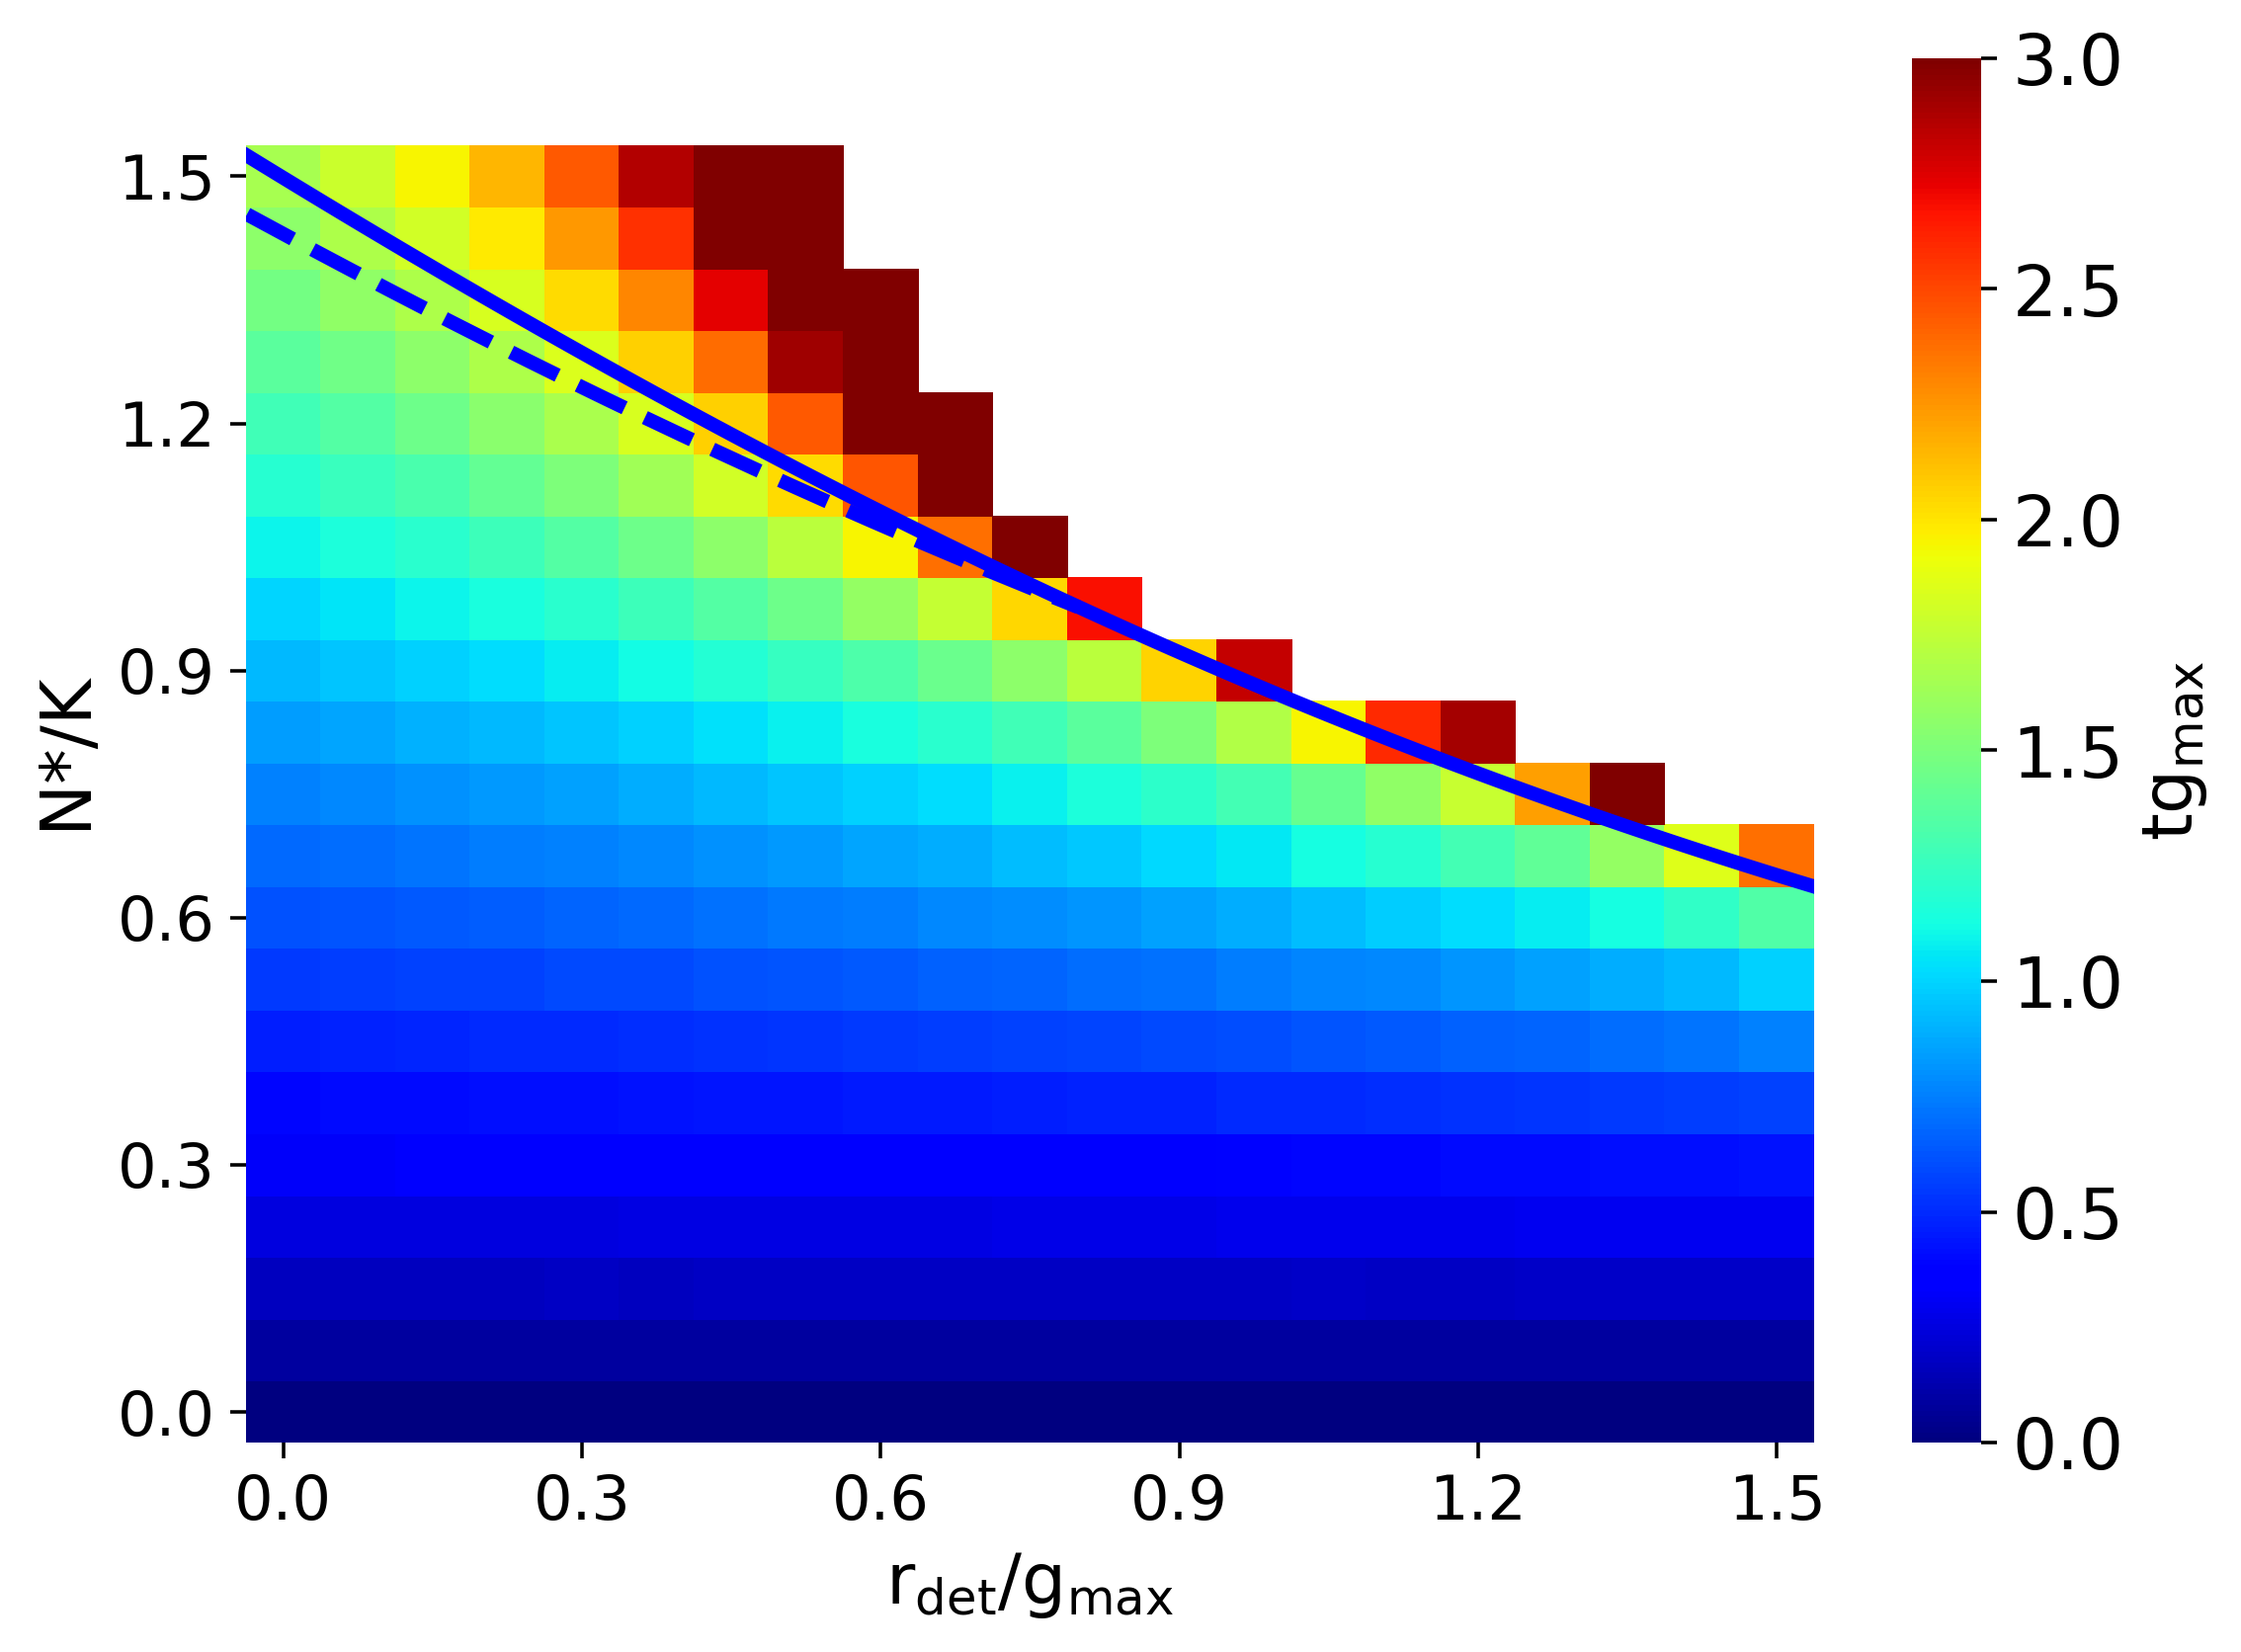

In [165]:
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(8, 5.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


# #this mask will only plot values between 15 and 20
# masko = (pivot < 15) | (pivot >= 20)

# #phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False, cmap='jet', xticklabels = 4, yticklabels=4, rasterized=True, vmax=3)
# ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
# #ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.1f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.1f}".format(float(y)), labels_y))


#plot the theoretical blue line #####################
theoryN_vals = np.vectorize(phase_diag_line)(det_ratio_vals)
# theoryN_vals[0] = 1.5
# theoryN_vals[-1] = 0.6
print(theoryN_vals[0])
print(theoryN_vals[-1])

#in order to get the line to be positioned correctly, need to multiply it by this scale factor.
#equal to the max value of the line divided by no. of squares in each axis
nsquares = len(param_data.index)**0.5 #no. of squares in each axis
scale_factor_x = nsquares/1.5
scale_factor_y = nsquares/1.5
sns.lineplot(x=det_ratio_vals*scale_factor_x, y=theoryN_vals*scale_factor_y, linewidth = 3.2, color="blue")
line = ax.lines[0] # get the line
line.set_ydata(line.get_ydata() - 0.5)



#plot the dashed line
det_ratio_vals_dashed = dashed_line_vals["r_det_ratio"]
theoryN_vals_dashed = dashed_line_vals["N_theory"]
print(theoryN_vals_dashed[0])
print(np.min(theoryN_vals_dashed))

scale_factor_x_dashed = nsquares/1.5
scale_factor_y_dashed = nsquares/1.5

sns.lineplot(x=det_ratio_vals_dashed*scale_factor_x_dashed, y=theoryN_vals_dashed*scale_factor_y_dashed, linewidth = 3.2, color="blue")
line = ax.lines[1] # get the line
line.set_ydata(line.get_ydata() - 0.5)
line.set_linestyle("--")
###########################################

ax.axis('tight')

ax.set_xlabel('r$_{\\rm det}/\\rm{g}_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)


cbar = ax.collections[0].colorbar
print(cbar)
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("tg$_{\max}$", fontsize=labelSize)
cbar.ax.locator_params(nbins=6)

plt.xticks(rotation=0)
plt.savefig('paper_plots/timeTo1Mh_heatmap.pdf', bbox_inches='tight')
plt.show()

In [12]:
pivot_stDev = param_data.pivot(index='n_thresh', columns='det_ratio', values='coeff_variation')

1.52469507659596
0.6787087810503355
1.45608311
1.00191157


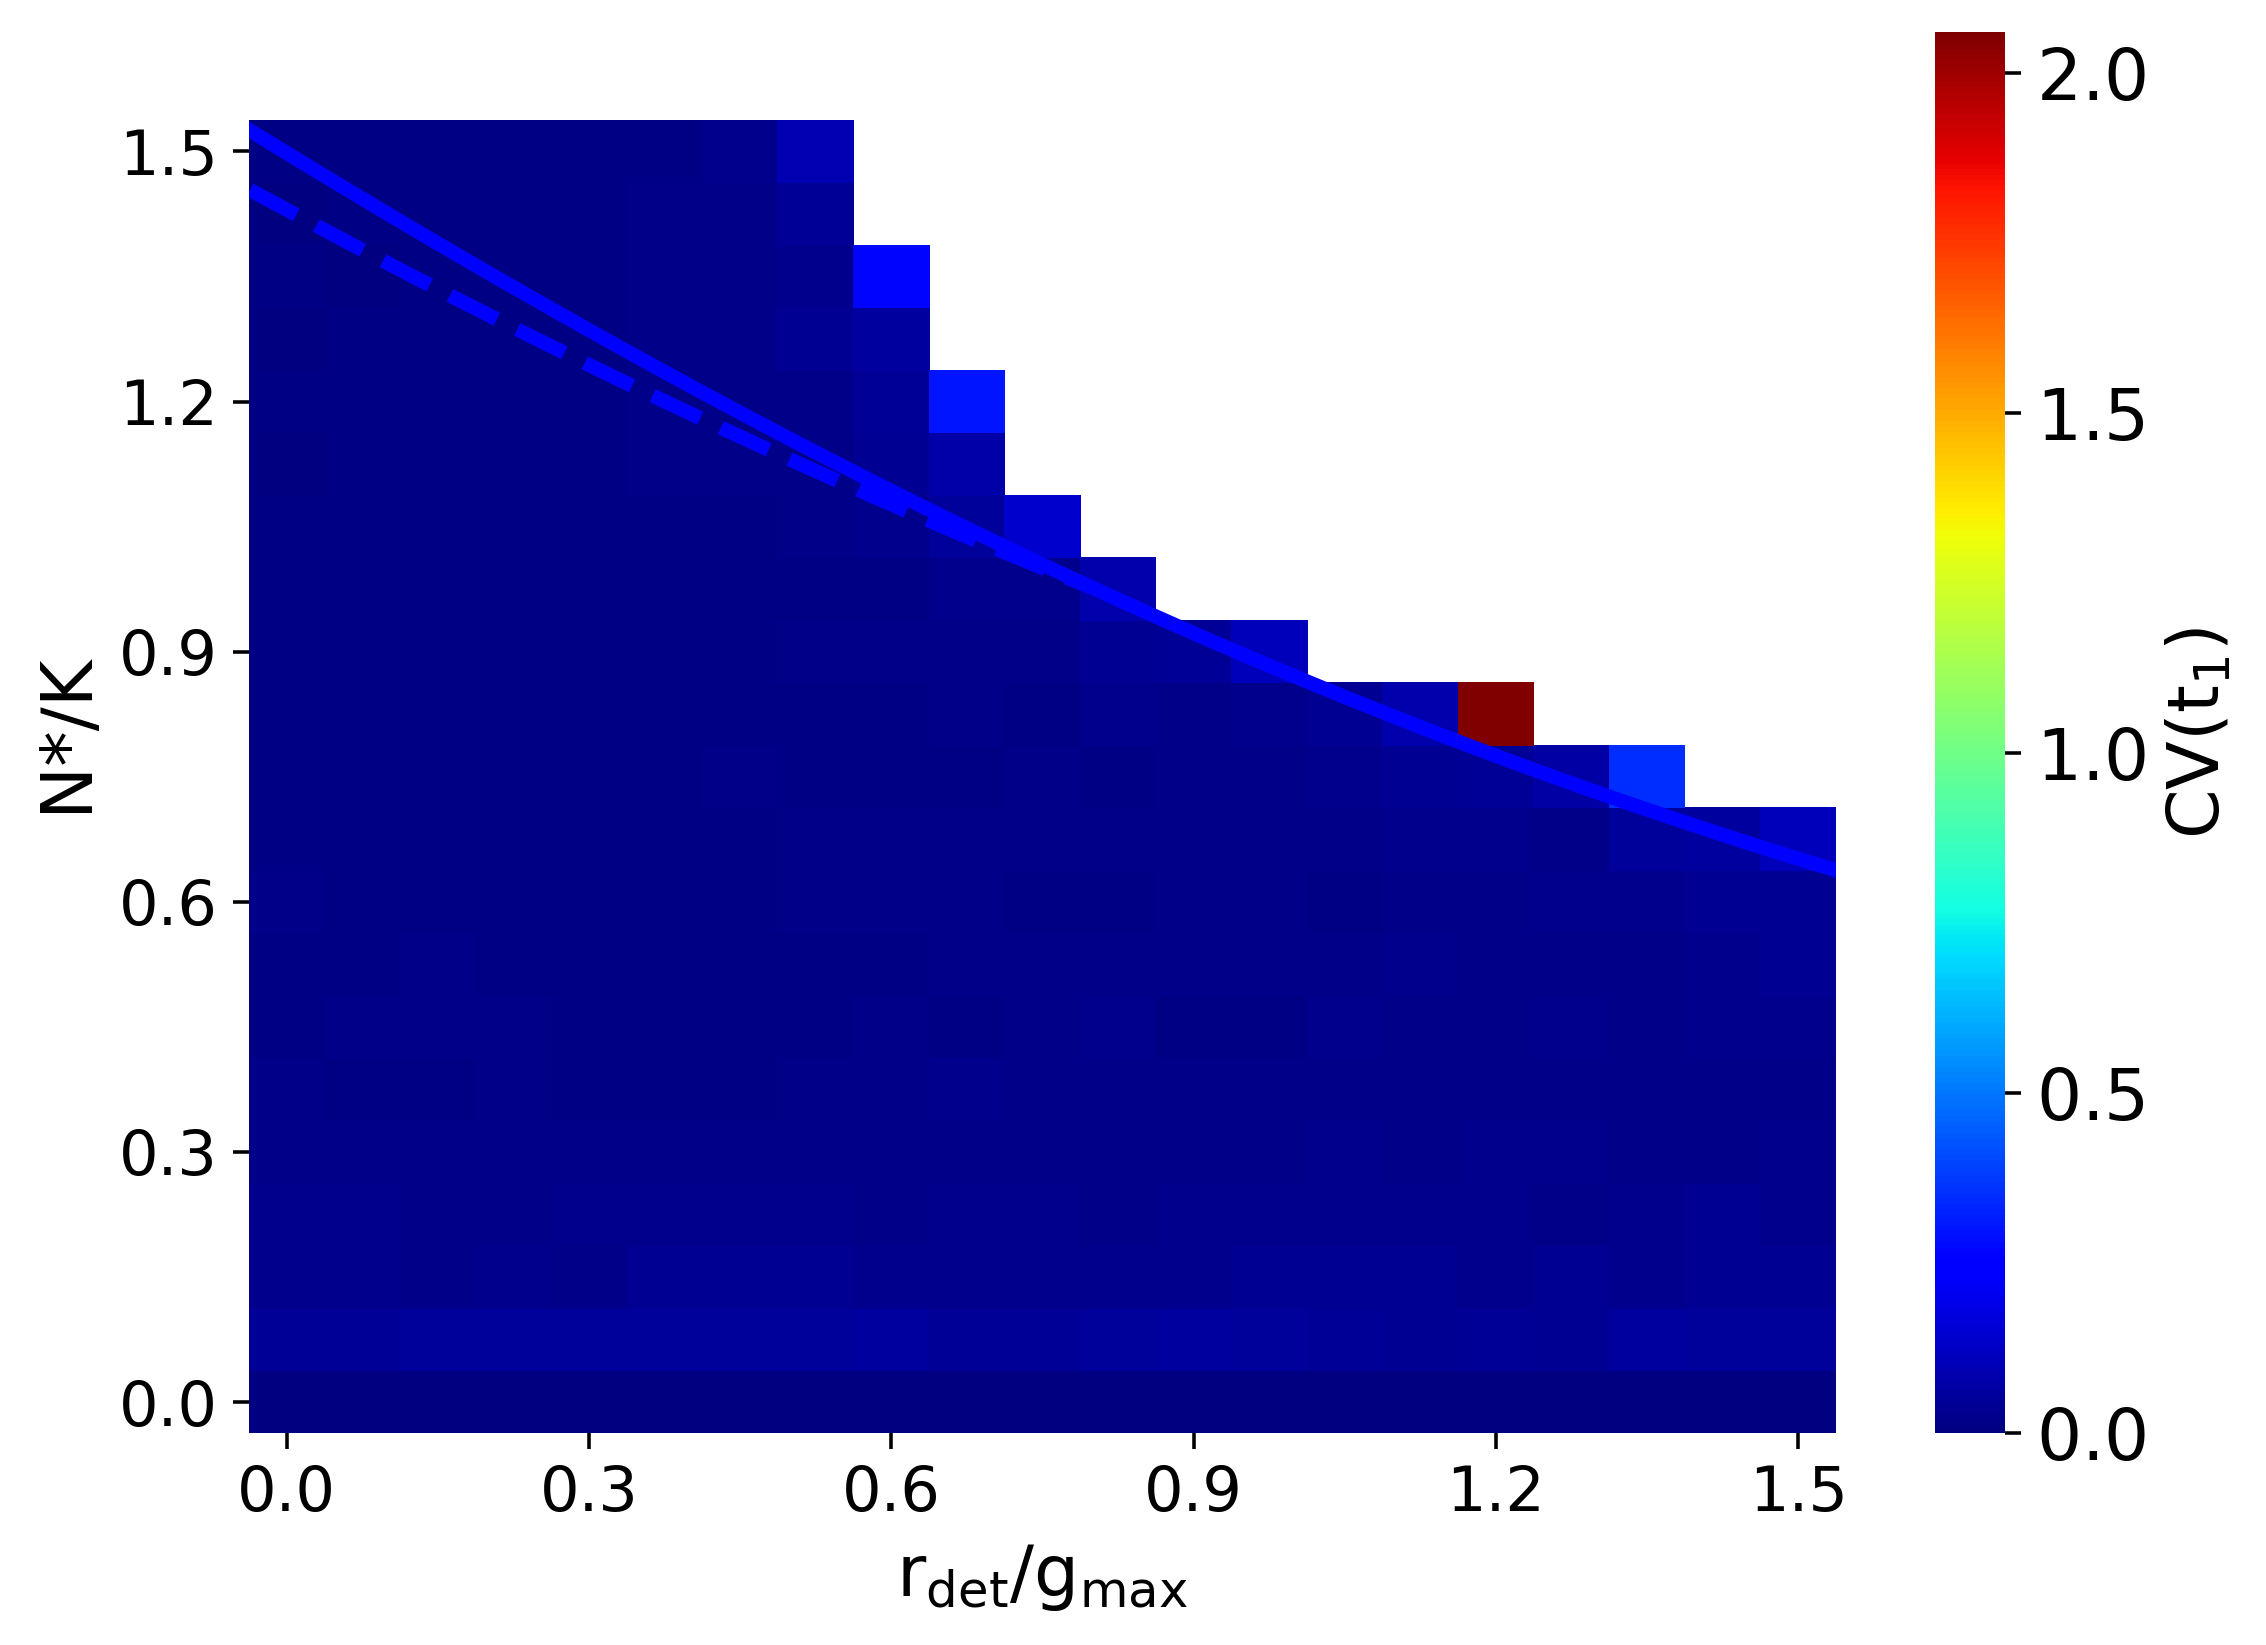

In [13]:
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(8, 5.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


import matplotlib.ticker as tkr
formatter = tkr.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-3, -2))

# #this mask will only plot values between 15 and 20
# masko = (pivot < 15) | (pivot >= 20)

# #phase_mask = (pivot['det_ratio']) > 0.5
#I THINK YOU CAN ADD "ax" AS AN ARGUMENT TO THE SNS.HEATMAP METHOD WHICH WILL ALLOW YOU TO SPECIFY WHICH SUBPLOT IS USED FOR THE HEATMAP
ax = sns.heatmap(pivot_stDev, annot=False, cmap='jet', xticklabels = 4, yticklabels=4, rasterized=True, cbar_kws={'format':formatter})
# ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
# #ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.1f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.1f}".format(float(y)), labels_y))

#plot the theoretical blue line #####################
theoryN_vals = np.vectorize(phase_diag_line)(det_ratio_vals)
# theoryN_vals[0] = 1.5
# theoryN_vals[-1] = 0.6
print(theoryN_vals[0])
print(theoryN_vals[-1])

#in order to get the line to be positioned correctly, need to multiply it by this scale factor.
#equal to the max value of the line divided by no. of squares in each axis
nsquares = len(param_data.index)**0.5 #no. of squares in each axis
scale_factor_x = nsquares/1.5
scale_factor_y = nsquares/1.5
sns.lineplot(x=det_ratio_vals*scale_factor_x, y=theoryN_vals*scale_factor_y, linewidth = 3.2, color="blue")
line = ax.lines[0] # get the line
line.set_ydata(line.get_ydata() - 0.5)



#plot the dashed line
det_ratio_vals_dashed = dashed_line_vals["r_det_ratio"]
theoryN_vals_dashed = dashed_line_vals["N_theory"]
print(theoryN_vals_dashed[0])
print(np.min(theoryN_vals_dashed))

scale_factor_x_dashed = nsquares/1.5
scale_factor_y_dashed = nsquares/1.5

sns.lineplot(x=det_ratio_vals_dashed*scale_factor_x_dashed, y=theoryN_vals_dashed*scale_factor_y_dashed, linewidth = 3.2, color="blue")
line = ax.lines[1] # get the line
line.set_ydata(line.get_ydata() - 0.5)
line.set_linestyle("--")
###########################################



ax.axis('tight')

ax.set_xlabel('r$_{\\rm det}/\\rm{g}_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("CV(t$_1$)", fontsize=labelSize)

#cbar = plt.colorbar()
cbar.ax.locator_params(nbins=6)

plt.xticks(rotation=0)
plt.savefig('paper_plots/CV_t1_heatmap.pdf', bbox_inches='tight')
plt.show()

In [14]:
def get_t1_vs_r_det(param_df, N_thresh):
    '''
    To see how t1 varies with the parameters, we'll plot a series of line graphs.  Each line will be a different value of N*,
    x axis will be r_det and y-axis will be t1.  (Essentially going from left to right on the heatmaps)
    
    DON'T FORGET TO REMOVE THE AESTHETIC ALTERATIONS MADE TO THE DATAFRAME AT THE START OF THE NOTEBOOK.
    '''
    
    r_det_vals = param_df["det_ratio"][np.isclose(param_df["n_thresh"], N_thresh)]
    t1_vals = param_df["tN_adjusted"][np.isclose(param_df["n_thresh"], N_thresh)]
    #print(r_det_vals)
    return r_det_vals, t1_vals

In [15]:
# fig, ax = plt.subplots(dpi=320)

# n_thresh_vals = np.arange(N_thresh_min, N_thresh_max+delta_N_thresh, delta_N_thresh)
# nCols = n_thresh_vals.size #no. of runs. -1 due to the time column
# colors = pl.cm.winter(np.linspace(0,1,nCols))
# i = 0

# for n_thresh in n_thresh_vals:
#     #print(n_thresh)
#     r_det_data, t1_data = get_t1_vs_r_det(param_data, n_thresh)
    
#     ax.plot(r_det_data, t1_data, color=colors[i], label=n_thresh)
#     i += 1

# #plt.semilogy()
# #plt.legend(ncol=3)
# plt.xlabel("r_det")
# plt.ylabel("t_1")
# plt.title("t1 vs r_det and N*")

# plt.savefig("paper_plots/heatmap_powerlaw.png")
# plt.semilogy()
# plt.savefig("paper_plots/heatmap_powerlaw_logy.png")
# plt.show()

In [16]:
# fig, ax = plt.subplots(dpi=320)
# ax.plot(det_ratio_vals, np.vectorize(phase_diag_line)(det_ratio_vals))

# det_ratio_vals_dashed = dashed_line_vals["r_det_ratio"]
# theoryN_vals_dashed = dashed_line_vals["N_theory"]

# ax.plot(det_ratio_vals_dashed, theoryN_vals_dashed)

In [17]:
def getT1HistoDataAndProcess(n_thresh, r_det, extra_N_vs_t_runs=False, reps500=False):
    '''
    This gets the datasets for the 100 runs of the time to 1st microhabitat sims (used to histogram the distribution of t1)
    Also uses the 24 runs used to make the phase diagram, so there's more data to use
    UPDATED: now also uses the extra reps used for b1, s1, t1, t2
    Also adds in a column with the scaled time, to compare with the phase diagram
    
    returns
    '''
    df_list = []
    df1 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/t1_histogram-N_thresh="+"{:.3f}".format(n_thresh)+"-r_det_ratio="+"{:.3f}".format(r_det)+".csv")
    df2 = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-"+"{:.3f}".format(n_thresh)+"_rDet-"+"{:.3f}".format(r_det)+".csv")
    
    df_list.append(df1)
    df_list.append(df2)
    
    #reps 500 is for b1, s1, r1 and r2, the big 500 rep runs
    if reps500:
        #500 reps session 1
        df_500reps_session1 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/t1_histogram-N_thresh="+"{:.3f}".format(n_thresh)+"-r_det_ratio="+"{:.3f}".format(r_det)+"-manyReps.csv")
        df_list.append(df_500reps_session1)
        #500 reps session 2
        df_500reps_session2 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/t1_histogram-N_thresh="+"{:.3f}".format(n_thresh)+"-r_det_ratio="+"{:.3f}".format(r_det)+"-manyReps-session_2.csv")
        df_list.append(df_500reps_session2)
    
    if extra_N_vs_t_runs:
        df_extra = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh="+"{:.3f}".format(n_thresh)+"_rDet="+"{:.3f}".format(r_det)+"-stochastic_microhabs_over_time.csv")
        df_extra["time_to_n"] = df_extra[" t_mh_0"]
        df_list.append(df_extra)
        
    #run 2 (better sampling used for the N over t files)
    if os.path.isfile("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh="+"{:.3f}".format(n_thresh)+"_rDet="+"{:.3f}".format(r_det)+"-stochastic_microhabs_over_time_run2.csv"):
        df_extra_fine = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh="+"{:.3f}".format(n_thresh)+"_rDet="+"{:.3f}".format(r_det)+"-stochastic_microhabs_over_time_run2.csv")
        df_extra_fine["time_to_n"] = df_extra_fine["t_mh_0"]
        df_list.append(df_extra_fine)

    df = pd.concat(df_list, ignore_index=True)
    df["t_scaled"] = df['time_to_n']*max_gRate
    
    return df
    

def plotT1Histogram(n_thresh, r_det, nbins, extra_N_vs_t_runs=False, reps500=False):
    
    fig, ax = plt.subplots(dpi=180)
    data = getT1HistoDataAndProcess(n_thresh, r_det, extra_N_vs_t_runs, reps500)
    
    t1_mean = data["t_scaled"].mean()
    t1_std  = data["t_scaled"].std()
    
    #use the legend as a hacky way to annotate the mean and stdev
    # create a list with two empty handles (or more if needed)
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 2
    labels=[]
    labels.append("mean(t$_1$) = {:.3f}".format(t1_mean))
    labels.append("std(t$_1$) = {:.3f}".format(t1_std))
    
    plt.hist(data["t_scaled"], bins=nbins)
    plt.title("N* = {:.3f},$\quad \quad$ r_det = {:.3f}".format(n_thresh, r_det), fontsize=14)
    plt.xlabel("t$_1$ * g$_\max$", fontsize=16)
    #plt.text(0.5, 0.9, "mean(t$_1$) = {:.3f}".format(t1_mean), transform=ax.transAxes, fontsize=16)
    #plt.text(0.5, 0.8, "std(t$_1$) = {:.3f}".format(t1_std), transform=ax.transAxes, fontsize=16)
    ax.legend(handles, labels, loc="best", handlelength=0, handletextpad=0, fontsize=14)
    plt.savefig('timeTo1Microhab_powerLaw_bigK_plots/n_thresh={:.3f}-r_det={:.3f}.pdf'.format(n_thresh, r_det), bbox_inches='tight')
    plt.show()
    
    

In [18]:
# df55 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh=0.600_rDet=0.300-stochastic_pop_over_time_run2.csv")
# #df55 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh=0.825_rDet=1.200-stochastic_microhabs_over_time.csv")
# #df55["time_to_n"] = df55["t_mh_0"]
# df55.keys()

# df66 = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh=0.825_rDet=1.200-stochastic_pop_over_time.csv")
# #df55[" t_mh_1"].max()
# df55.keys()

In [19]:
# for n_thresh, r_det in histogram_param_pairs:
#     #also include the extra runs if there are any
# #     if (math.isclose(n_thresh, 0.825) and math.isclose(r_det, 1.2)) or (math.isclose(n_thresh, 0.6) and math.isclose(r_det, 0.3)):
# #         extra_N_vs_t_runs = True
# #     else:
# #         extra_N_vs_t_runs = False
        
#     extra_N_vs_t_runs = (math.isclose(n_thresh, 0.825) and math.isclose(r_det, 1.2)) or (math.isclose(n_thresh, 0.6) and math.isclose(r_det, 0.3))
        
#     plotT1Histogram(n_thresh, r_det, nbins=36, extra_N_vs_t_runs=extra_N_vs_t_runs, reps500=True)

In [56]:
def plot2x2_t1_powerlaws(param_pairs):
    '''plots a 2x2 plot of the t1 power law histograms'''
    
    fig, axes = plt.subplots(2, 2, dpi=220)
    fig.set_size_inches(6,5)
    titleSize = 16
    labelSize = 16
    numbersize = 12
    legendsize = 10
    IDsize=12
    nbins = 32
    
    letters = list(string.ascii_lowercase)[:len(param_pairs)]
    i = 0
    
    for ax, param_pair, letter in zip(axes.flat, param_pairs, letters):
        
        n_thresh, r_det = param_pair
        extra_N_vs_t_runs = (math.isclose(n_thresh, 0.825) and math.isclose(r_det, 1.2)) or (math.isclose(n_thresh, 0.6) and math.isclose(r_det, 0.3))
        reps500 = True
        
        t1_df = getT1HistoDataAndProcess(n_thresh, r_det, extra_N_vs_t_runs, reps500)
        t1_mean = t1_df["t_scaled"].mean()
        t1_std  = t1_df["t_scaled"].std()
        
        #use the legend as a hacky way to annotate the mean and stdev
        # create a list with two empty handles (or more if needed)
        handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 2
        labels=[]
        labels.append("$\mu$(t$_1$) = {:.3f}".format(t1_mean))
        labels.append("$\sigma$(t$_1$) = {:.3f}".format(t1_std))

        ax.hist(t1_df["t_scaled"], bins=nbins)
        ax.set_title("N* = {:.3f}".format(n_thresh)+",$\quad$ r$_{\\rm det}$ = "+"{:.3f}".format(r_det), fontsize=12)
        #plt.xlabel("t$_1$ * g$_\max$", fontsize=16)
        #plt.text(0.5, 0.9, "mean(t$_1$) = {:.3f}".format(t1_mean), transform=ax.transAxes, fontsize=16)
        #plt.text(0.5, 0.8, "std(t$_1$) = {:.3f}".format(t1_std), transform=ax.transAxes, fontsize=16)
        #ax.legend(handles, labels, loc="best", handlelength=0, handletextpad=0, fontsize=9)
        
        #add insets to the first two plots
        if i < 2 :
            ax_ins = inset_axes(ax, width="50%", height="50%")
            ax_ins.hist(t1_df["t_scaled"], bins=nbins)
            ax_ins.set_yscale("log", nonposy='clip')
            ax_ins.set_ylabel("log(N)", labelpad=-2)
            ax_ins.set_xlabel("tg$_{\max}$", labelpad=-4)
            ax_ins.set_xticklabels([])
            ax_ins.set_yticklabels([])

        
        if i >= 2: ax.set_xlabel("tg$_{\max}$", fontsize=11)
        if i%2 == 0: ax.set_ylabel("N", fontsize=11)
        #ax.label_outer()
        
        if i < 2 : ax.text(0.87, 0.04, "("+letter+")", transform=ax.transAxes, fontsize=12.8)
        else: ax.text(0.01, 0.89, "("+letter+")", transform=ax.transAxes, fontsize=12.8)
            
        i +=1
        #ax.set_xscale("log", nonposx='clip')
#         ax.set_yscale("log", nonposy='clip')
    
    
    plt.subplots_adjust(hspace=0.35)
    plt.savefig('timeTo1Microhab_powerLaw_bigK_plots/2x2histogram_t1Distbs_inset.pdf', bbox_inches='tight')
    plt.show()

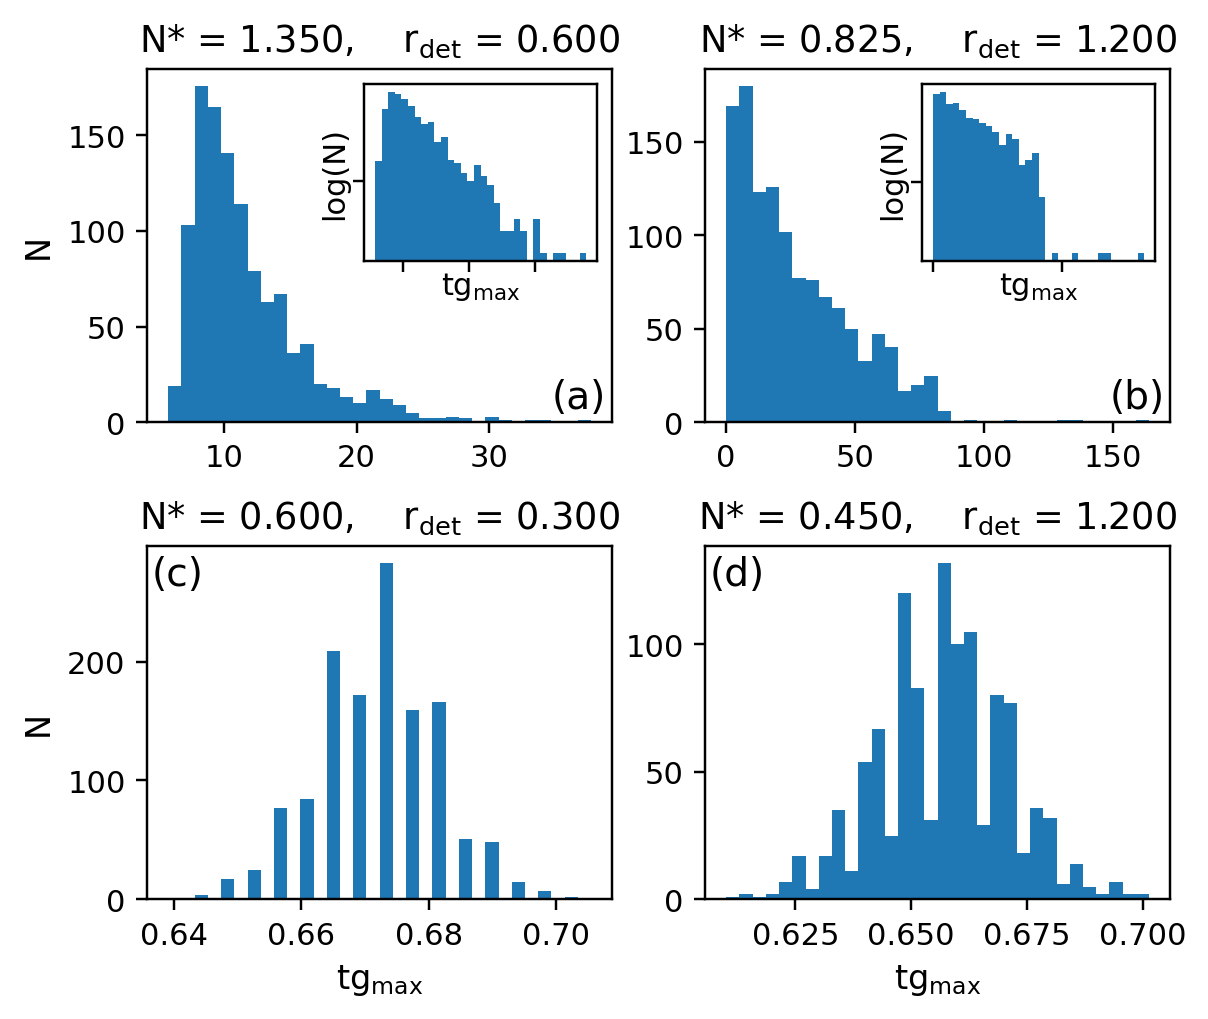

In [57]:
plot2x2_t1_powerlaws(histogram_param_pairs)

In [327]:
def plotPhaseDiagramAndHistograms(param_pairs, param_pair_labels):
    '''
    This method will combine the t1 phase diagram and the 4 histograms of the selected parameter pairs.
    Have the heatmap in the middle and the 4 histograms on the outside, 2 on left and 2 on right.
    Can use gridspec for this.
    
    param_pairs
    '''
    fig = plt.figure(dpi=320)
    fig.set_size_inches(8, 3.7)
    titleSize = 16
    labelSize = 16
    numbersize = 14
    legendsize = 10
    IDsize=12

    gs = fig.add_gridspec(100, 100, wspace=0.6, hspace=0.34)
    
    ax_b1 = fig.add_subplot(gs[:42, 0:19]) #histogram of b1
    ax_r1 = fig.add_subplot(gs[58:, 0:19]) #histogram of r1
    
    ax_hm = fig.add_subplot(gs[:, 26:-21]) #heatmap of t1
    
    ax_s1 = fig.add_subplot(gs[:42, -19:]) #histogram of s1
    ax_r2 = fig.add_subplot(gs[58:, -19:]) #histogram of r2
    
    histogram_axes = [ax_b1, ax_s1, ax_r1, ax_r2]
    letters = list(string.ascii_lowercase)[:len(param_pairs)]
    nbins = 32
    
    #PLOTTING THE HISTOGRAMS
    i = 0
    for ax, param_pair, title, letter in zip(histogram_axes, param_pairs, histogram_param_pair_labels, letters):
        
        n_thresh, r_det = param_pair
        extra_N_vs_t_runs = (math.isclose(n_thresh, 0.825) and math.isclose(r_det, 1.2)) or (math.isclose(n_thresh, 0.6) and math.isclose(r_det, 0.3))
        reps500 = True
        
        t1_df = getT1HistoDataAndProcess(n_thresh, r_det, extra_N_vs_t_runs, reps500)

        ax.hist(t1_df["t_scaled"], bins=nbins)
        #add insets to the first two plots
        if i < 2 :
            ax_ins = inset_axes(ax, width="50%", height="50%")
            ax_ins.hist(t1_df["t_scaled"], bins=nbins)
            ax_ins.set_yscale("log", nonposy='clip')
            ax_ins.set_ylabel("log(N)", labelpad=-2)
            ax_ins.set_xlabel("tg$_{\max}$", labelpad=-4)
            ax_ins.set_xticklabels([])
            ax_ins.set_yticklabels([])

        
        ax.set_xlabel("tg$_{\max}$", fontsize=11, labelpad=-2)
        #ax.axes.get_yaxis().set_visible(False)
        ax.set_yticklabels([])
        ax.set_ylabel("N", fontsize=11, labelpad=-2)
        ax.set_title(title, pad=0)
        
        if i < 2: ax.set_xlabel("")
        #ax.label_outer()
        
        #if i < 2 : ax.text(0.87, 0.04, "("+letter+")", transform=ax.transAxes, fontsize=12.8)
        #else: ax.text(0.01, 0.89, "("+letter+")", transform=ax.transAxes, fontsize=12.8)
            
        i +=1
        
        
    #PLOT THE HEATMAP
    pivot = param_data.pivot(index='n_thresh', columns='det_ratio', values='tN_adjusted')
    ax_hm1 = sns.heatmap(pivot, annot=False, cmap='twilight_shifted', xticklabels = 3, yticklabels=3, rasterized=True, cbar=True, vmax=3., ax=ax_hm)

    
    #highlight the chosen histogram squares
    pivot_min = np.nanmin(pivot.values)
    pivot_max = np.nanmax(pivot.values)
    #print(pivot_min)
    masko_full = np.zeros_like(pivot)
    for pp, label in zip(histogram_param_pairs, histogram_param_pair_labels):
        n_thresh, r_det = pp
        #pivot.keys() returns the values of r_det with floating point errors
        #following lines get the keys that are used in pivot
        r_det_key = (pivot.keys()[np.isclose(pivot.keys(), r_det)])[0]
        n_thresh_key = (pivot[r_det_key].keys()[np.isclose(pivot[r_det_key].keys(), n_thresh)])[0]

        r_det_key_index = np.where(np.isclose(pivot.keys(), r_det))[0][0]
        #print(pivot[pivot.keys()[r_det_key_index]])

        n_thresh_key_index = np.where(np.isclose(pivot[pivot.keys()[r_det_key_index]], n_thresh))

        masko = np.isclose(pivot, pivot[r_det_key][n_thresh_key])
        masko_full += masko
        #print(mask)
        annotations = pivot.astype(str)
        annotations[masko] = label
        ax_hm1 = sns.heatmap(pivot, mask=~masko, cmap='Greens', cbar=False, annot=annotations, fmt="s", vmin=pivot_min, vmax=pivot_max, xticklabels=0, yticklabels=0, 
                             ax=ax_hm, annot_kws={"size":7})
    
    ax_hm1 = sns.heatmap(pivot, annot=False, cmap='twilight_shifted', xticklabels = 6, yticklabels=6, rasterized=True, cbar=False, mask=masko_full, vmax=3, ax=ax_hm)
    
    ax_hm.invert_yaxis()
    labels_x = [label.get_text() for label in ax_hm.get_xticklabels()]
    ax_hm.set_xticklabels(map(lambda x: "{:.1f}".format(float(x)), labels_x))
    labels_y = [label.get_text() for label in ax_hm.get_yticklabels()]
    ax_hm.set_yticklabels(map(lambda y: "{:.1f}".format(float(y)), labels_y))
    
    ax_hm.axis('tight')

    ax_hm.set_xlabel('r$_{\\rm det}/\\rm{g}_{\max}$', fontsize=12, labelpad=0)
    ax_hm.set_ylabel('N*/K', fontsize=12, labelpad=0)
    ax_hm.xaxis.set_tick_params(labelsize=10)
    ax_hm.yaxis.set_tick_params(labelsize=10)
    
    cbar = ax_hm1.collections[0].colorbar
    #print(cbar)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label("tg$_{\max}$", fontsize=12, labelpad=-7)
    cbar.ax.locator_params(nbins=4)
    
    #fig.tight_layout()
    plt.savefig("timeTo1Microhab_powerLaw_bigK_plots/heatmap_and_histograms.pdf", bbox_inches="tight")
    plt.show()

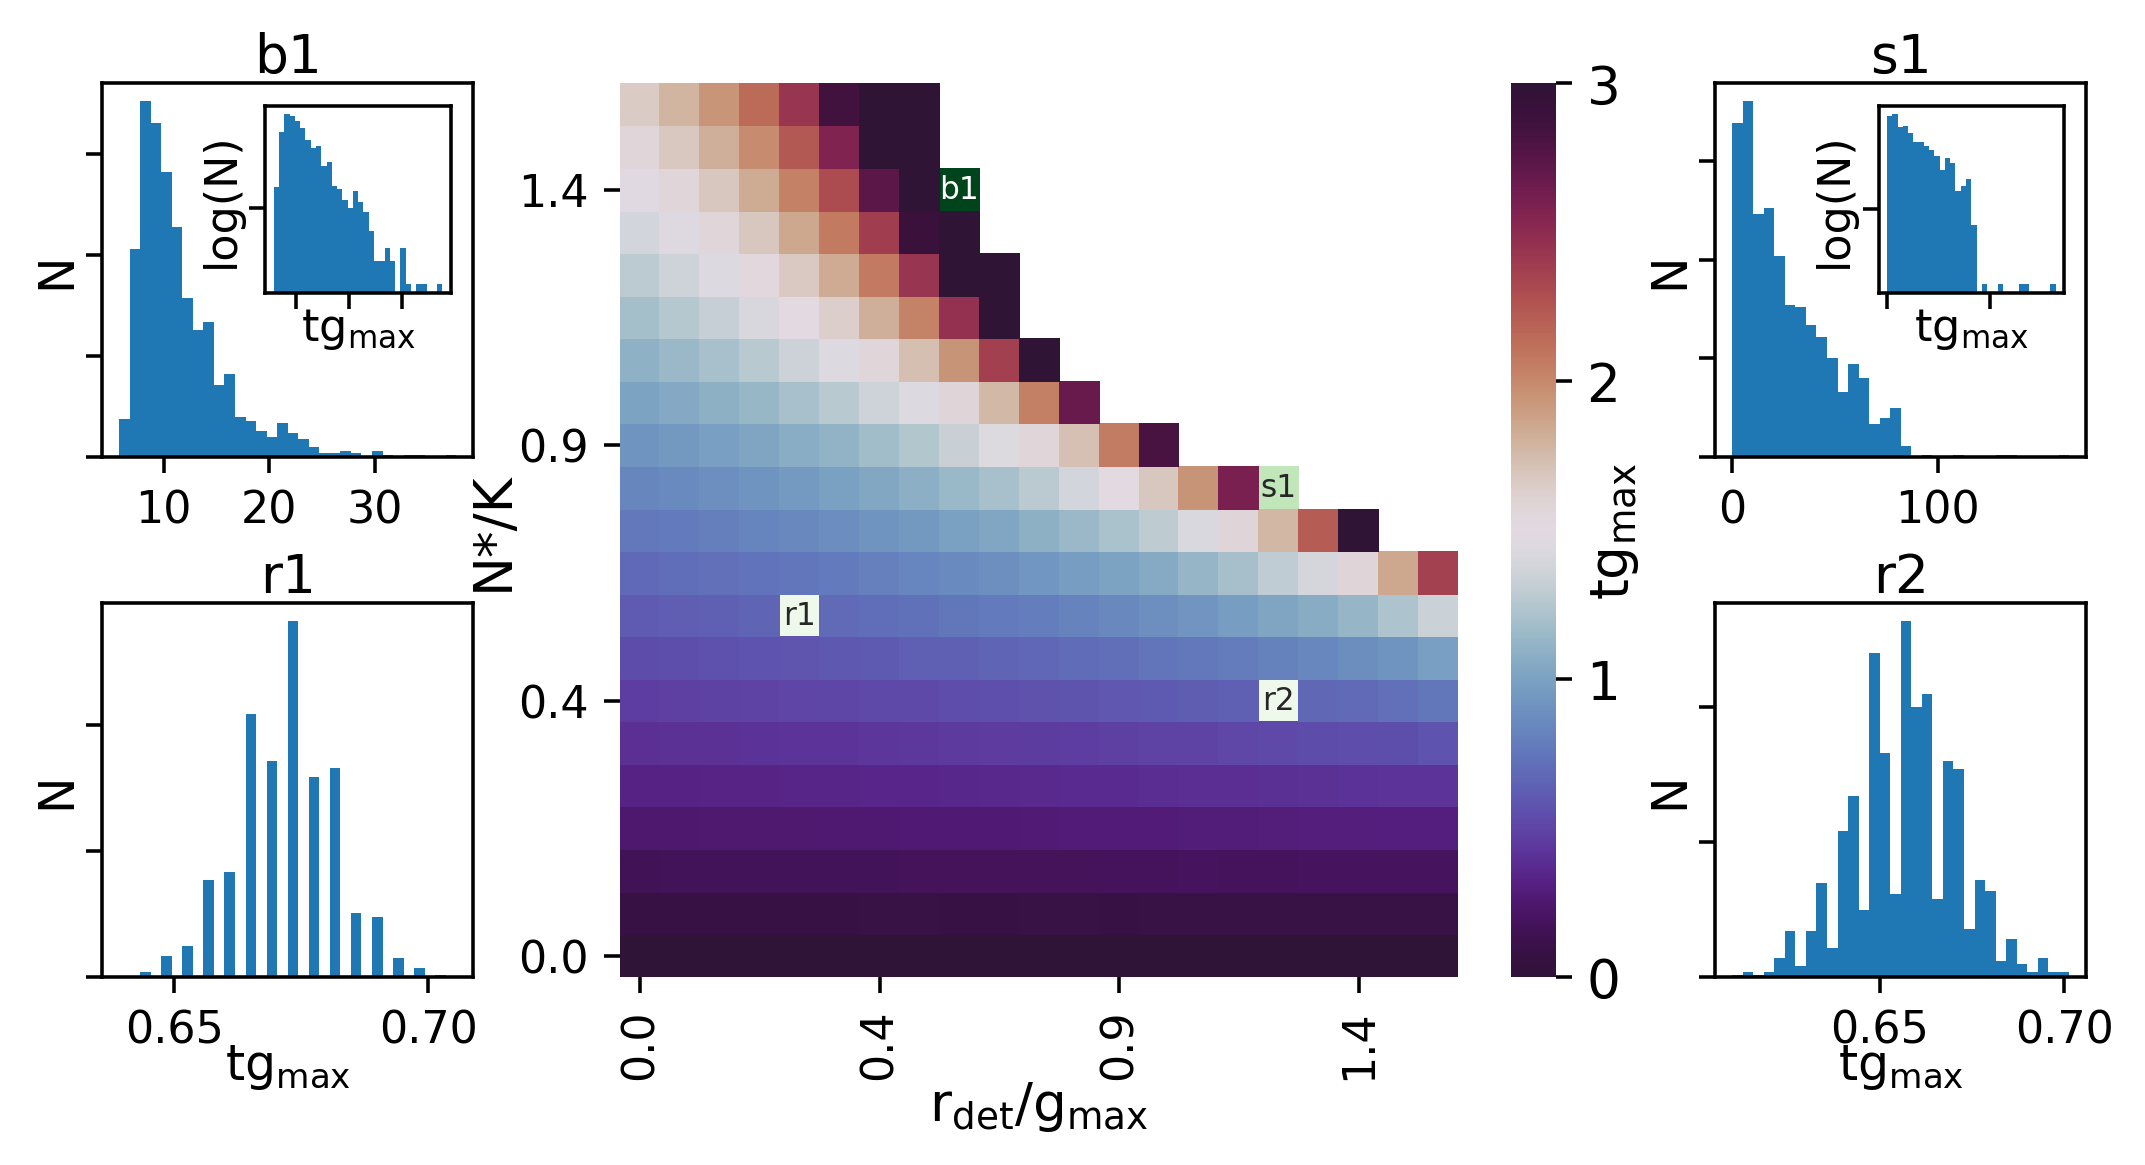

In [328]:
plotPhaseDiagramAndHistograms(histogram_param_pairs, histogram_param_pair_labels)

In [41]:
def plotT1PowerLawNOverTime(n_thresh, r_det):
    '''Used to plot the populations over time for some of the parameter pairs used in the phase diagram'''
    pop_dataset = pd.read_csv("timeTo1Microhab_powerLaw_bigK_results/N_vs_t/nThresh="+"{:.3f}".format(n_thresh)+"_rDet="+"{:.3f}".format(r_det)+"-stochastic_pop_over_time_run2.csv")
    nRuns = len(pop_dataset.columns) - 1 #no. of runs performed, -1 to account for the time column
    fig, ax = plt.subplots(figsize=(6,5), dpi=120)
    plt.rcParams['font.sans-serif'] = "Arial"
    K_val = 10000
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nRuns))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    #print(pop_dataset.keys())
    
    for p in range(nRuns):

            #ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        ax.plot(pop_dataset['t'][:-1]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-1])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
    
    ax.set_ylabel("N/K", fontsize=16)
    ax.set_xlabel("tg$_{\\rm max}$", fontsize=16)
    plt.title("N* = {:.3f},$\quad \quad$ r_det = {:.3f}".format(n_thresh, r_det), fontsize=14)
    plt.show()

In [ ]:
#plotT1PowerLawNOverTime(0.6, 0.3)

In [ ]:
pivot = param_data.pivot(index='n_thresh', columns='det_ratio', values='tN_adjusted')

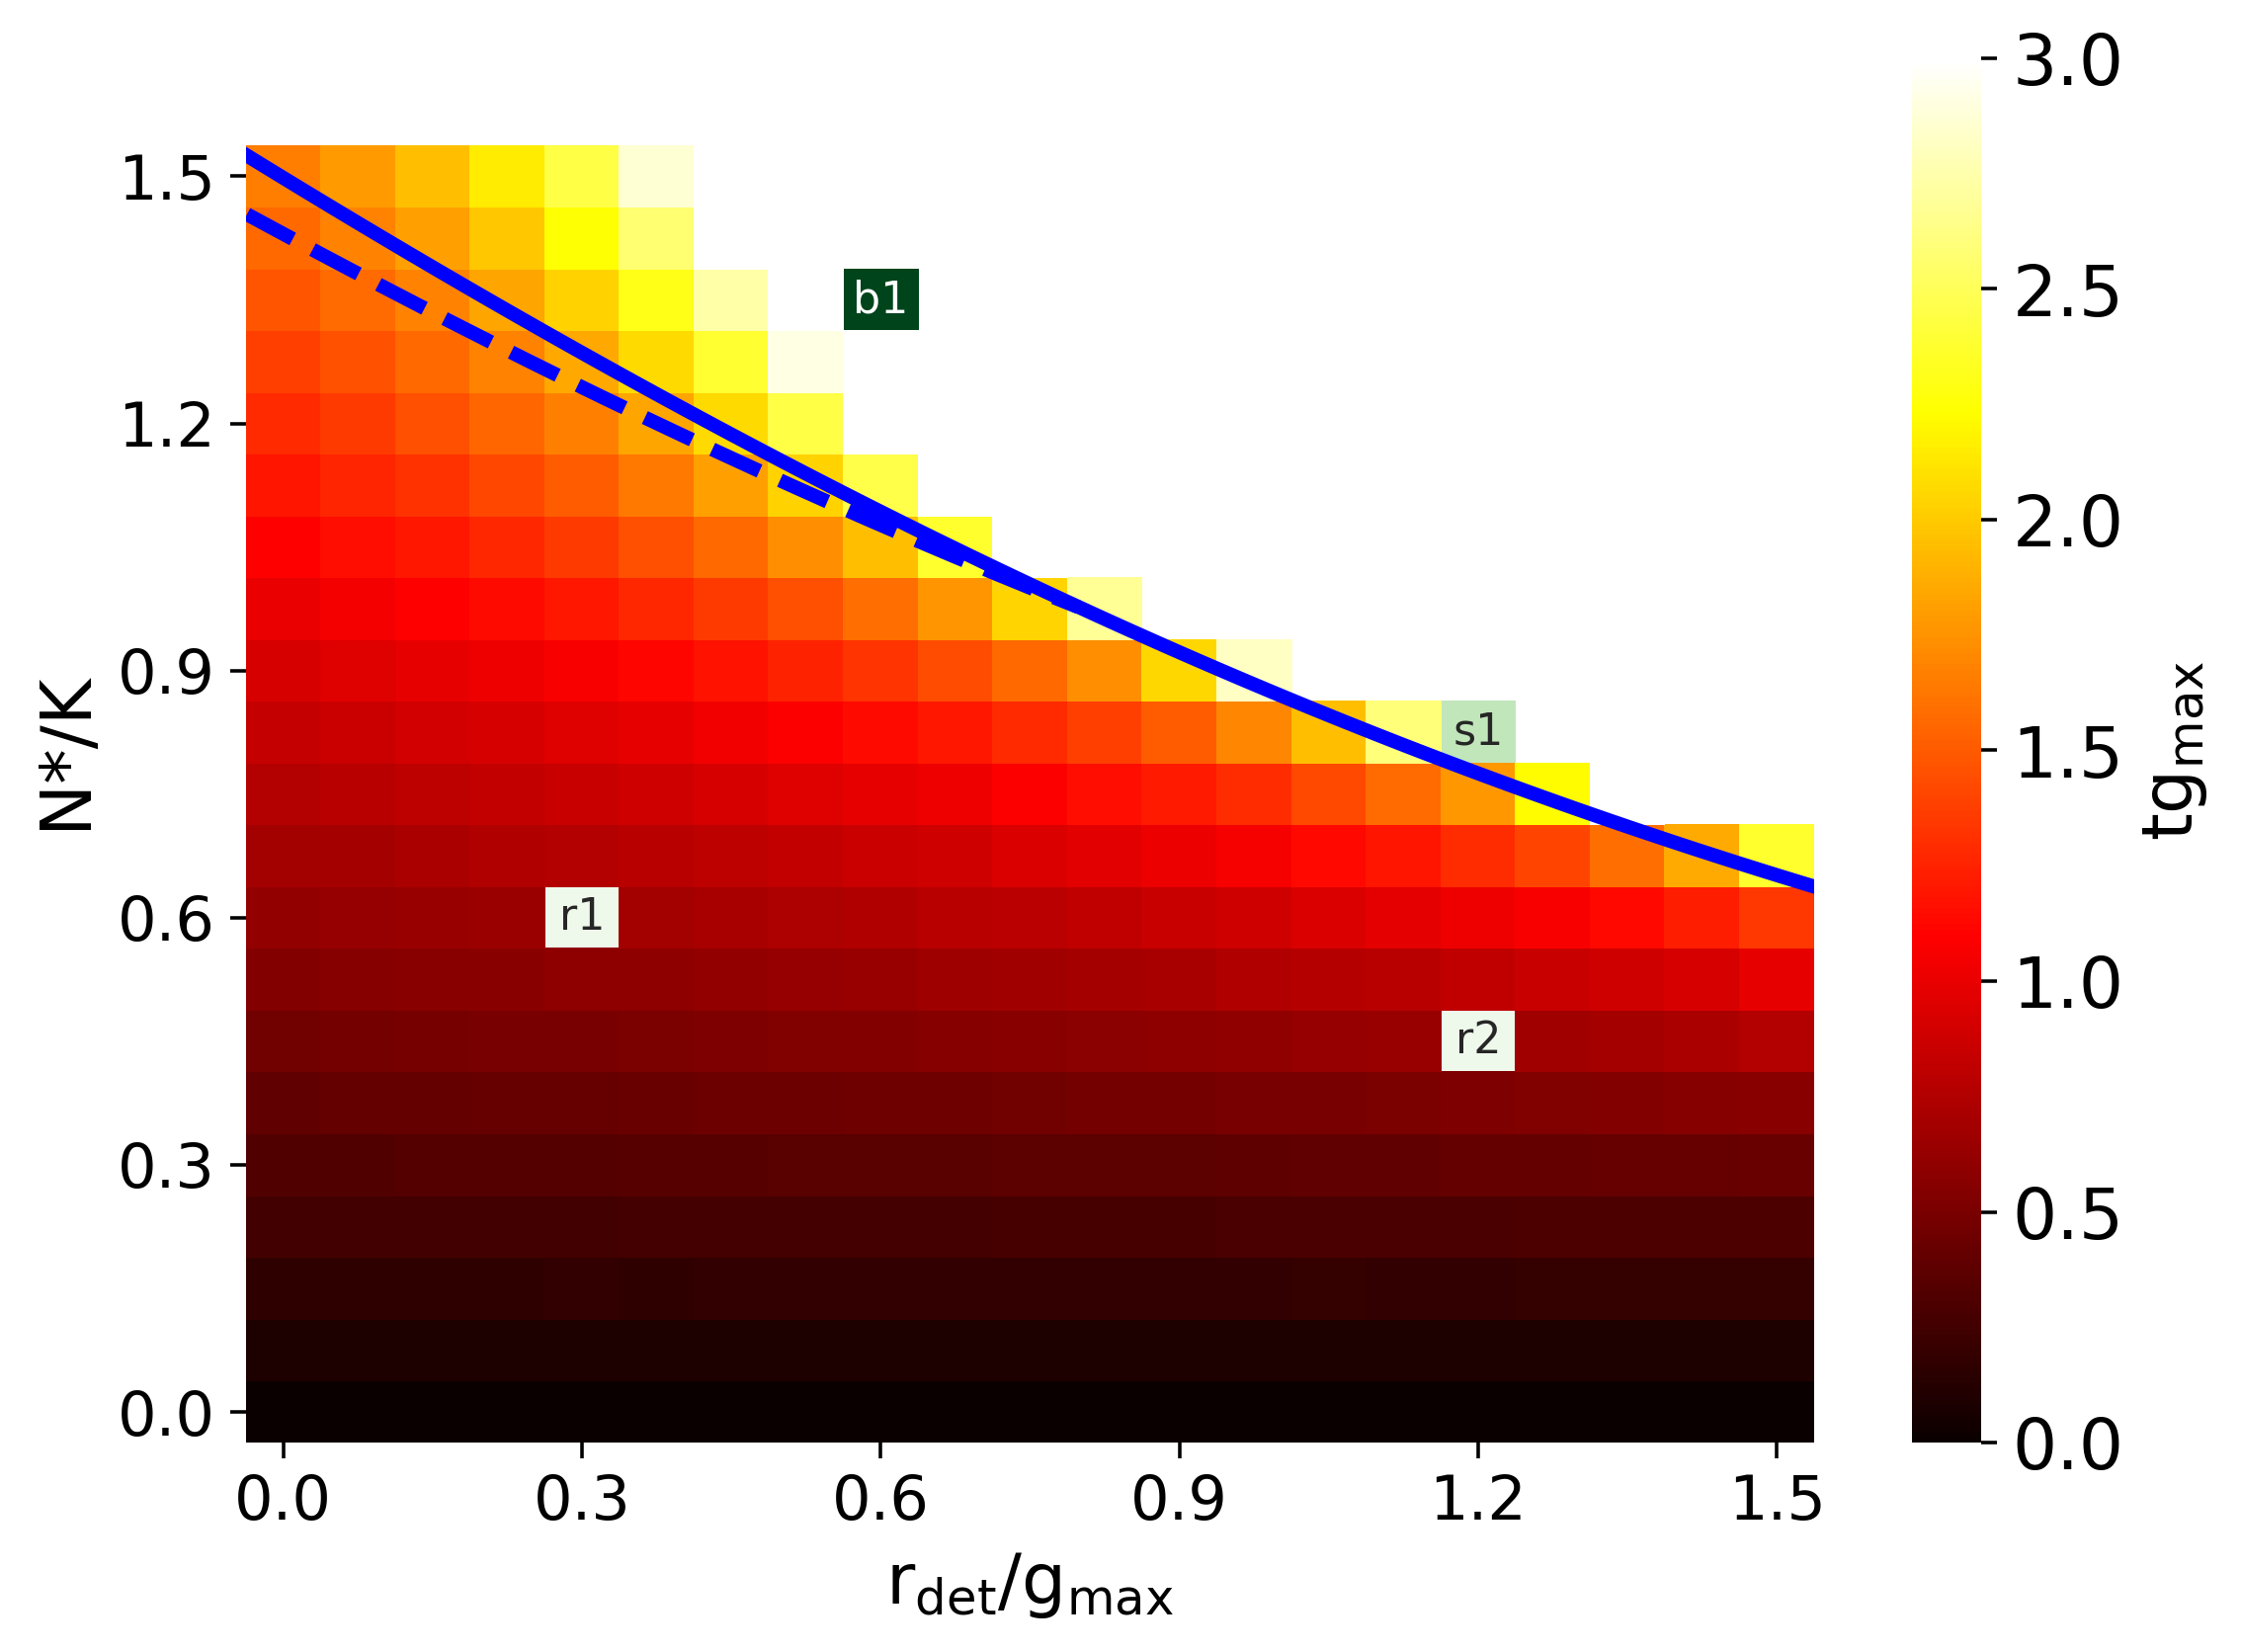

In [103]:
'''
Here we'll replot the t1 heatmap, but with the histogrammed squares highlighted
'''
fig, ax = plt.subplots(dpi=320)
fig.set_size_inches(8, 5.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


# #this mask will only plot values between 15 and 20
# masko = (pivot < 15) | (pivot >= 20)

# #phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False, cmap='hot', xticklabels = 4, yticklabels=4, rasterized=True, cbar=True, vmax=3.)

pivot_min = np.nanmin(pivot.values)
pivot_max = np.nanmax(pivot.values)
#print(pivot_min)
masko_full = np.zeros_like(pivot)
#for n_thresh, r_det, label in zip(histogram_param_pairs, histogram_param_pair_labels):
for pp, label in zip(histogram_param_pairs, histogram_param_pair_labels):
    n_thresh, r_det = pp
    #pivot.keys() returns the values of r_det with floating point errors
    #following lines get the keys that are used in pivot
    r_det_key = (pivot.keys()[np.isclose(pivot.keys(), r_det)])[0]
    n_thresh_key = (pivot[r_det_key].keys()[np.isclose(pivot[r_det_key].keys(), n_thresh)])[0]
    
    r_det_key_index = np.where(np.isclose(pivot.keys(), r_det))[0][0]
    #print(pivot[pivot.keys()[r_det_key_index]])
    
    n_thresh_key_index = np.where(np.isclose(pivot[pivot.keys()[r_det_key_index]], n_thresh))
    
    #print(n_thresh_key_index)
    #print(r_det_key)
    #print(n_thresh_key)
    #print(np.where(np.isclose(pivot.keys(), r_det))[0][0])
    
    masko = np.isclose(pivot, pivot[r_det_key][n_thresh_key])
    masko_full += masko
    #print(mask)
    annotations = pivot.astype(str)
    annotations[masko] = label
    ax = sns.heatmap(pivot, mask=~masko, cmap='Greens', cbar=False, annot=annotations, fmt="s", vmin=pivot_min, vmax=pivot_max, xticklabels = 0, yticklabels=0)
    
    #print(pivot[0.07499999999999997].keys())
    #n_thresh_loc = pivot.columns.get_loc(n_thresh)
#     print(pivot.keys())
#     masko = (np.isclose(pivot["n_thresh"], n_thresh) & (np.isclose(pivot["det_ratio"], r_det)))
#     print(masko)
# ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
# #ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax = sns.heatmap(pivot, annot=False, cmap='hot', xticklabels = 4, yticklabels=4, rasterized=True, cbar=False, mask=masko_full, vmax=3)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.1f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.1f}".format(float(y)), labels_y))


#plot the theoretical blue line #####################
theoryN_vals = np.vectorize(phase_diag_line)(det_ratio_vals)
# theoryN_vals[0] = 1.5
# theoryN_vals[-1] = 0.6
#print(theoryN_vals[0])
#print(theoryN_vals[-1])

#in order to get the line to be positioned correctly, need to multiply it by this scale factor.
#equal to the max value of the line divided by no. of squares in each axis
nsquares = len(param_data.index)**0.5 #no. of squares in each axis
scale_factor_x = nsquares/1.5
scale_factor_y = nsquares/1.5
sns.lineplot(x=det_ratio_vals*scale_factor_x, y=theoryN_vals*scale_factor_y, linewidth = 3.2, color="blue")
line = ax.lines[0] # get the line
line.set_ydata(line.get_ydata() - 0.5)



#plot the dashed line
det_ratio_vals_dashed = dashed_line_vals["r_det_ratio"]
theoryN_vals_dashed = dashed_line_vals["N_theory"]
#print(theoryN_vals_dashed[0])
#print(np.min(theoryN_vals_dashed))

scale_factor_x_dashed = nsquares/1.5
scale_factor_y_dashed = nsquares/1.5

sns.lineplot(x=det_ratio_vals_dashed*scale_factor_x_dashed, y=theoryN_vals_dashed*scale_factor_y_dashed, linewidth = 3.2, color="blue")
line = ax.lines[1] # get the line
line.set_ydata(line.get_ydata() - 0.5)
line.set_linestyle("--")
###########################################

ax.axis('tight')

ax.set_xlabel('r$_{\\rm det}/\\rm{g}_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("tg$_{\max}$", fontsize=labelSize)
cbar.ax.locator_params(nbins=6)

plt.xticks(rotation=0)
plt.savefig('timeTo1Microhab_powerLaw_bigK_plots/highlighted_t1_phase_diagram.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#print(param_data["coeff_variation"][~np.isnan(param_data["coeff_variation"])])

In [ ]:
#print(param_data)

In [ ]:
# plt.hist(param_data["tN_adjusted"][(param_data["tN_adjusted"]>0) & (param_data["tN_adjusted"]<3)].values, bins=20)
# #plt.show()

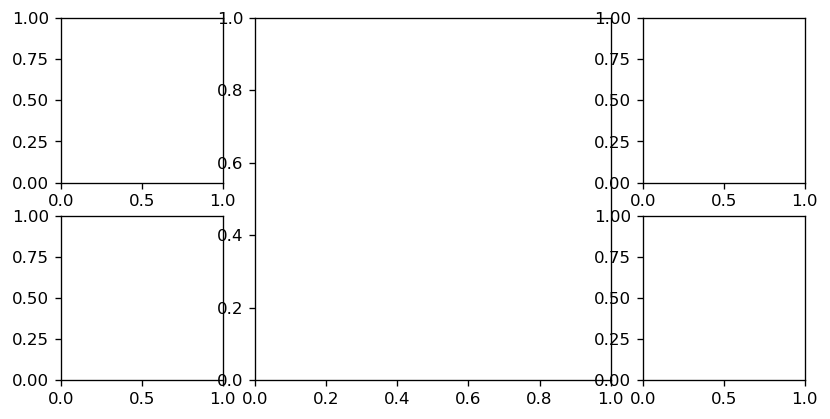

In [73]:
plotPhaseDiagramAndHistograms()